In [1]:
#!pip install tweepy

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [1]:
import tweepy
from tweepy import OAuthHandler

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import numpy as np

#### Account and API access setup
This would work only if you have a twitter developer account

In [2]:
#Customer credentials
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

In [76]:
#Setup for API access
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Set up complete! Now you can get live tweets straight from Twitter!

### Twitter API reference

http://docs.tweepy.org/en/v3.5.0/api.html

In [77]:
#Get the tweets from my timeline
tweets = api.home_timeline()

In [78]:
type(tweets)

tweepy.models.ResultSet

In [79]:
print(tweets[0].text)
print(tweets[1].text)

Morning walk #Palakkad https://t.co/6cScF6eY64
We have told the farmers that we will give them in writing the assurances that they seek. What PM @NarendraModi has… https://t.co/30hA2sOD3M


In [7]:
for tweet in tweets[:5]:
    print(tweet.text)

Deadlock over farm laws likely to end in 24-48 hours, breakthrough expected in final talks: Dushyant Chautala  https://t.co/BFw2kYNMTX
#Breaking | Congress leader @priyankagandhi slams the Center over fuel price hike. Tweets infographics comparing fu… https://t.co/VdI63v2YiF
#Breaking | PM @NarendraModi takes to Twitter to recall the valor and sacrifice of those who lost their lives in th… https://t.co/LTWEPt7Lpc
6TH phase of J&amp;K DDC polls to be held today. 

Details by Sohil. https://t.co/HbBQWOIEjK
#Breaking | All India Kisan Sangharsh Coordination Committee (AIKSCC) clears stand on farm laws. 

‘Want all 3 laws… https://t.co/1xNWUse92m


### Getting some tweets from a specified handle

In [8]:
tweets = api.user_timeline(screen_name='narendramodi',count=50)

In [9]:
type(tweets)

tweepy.models.ResultSet

#### Anatomy of a tweet

In [10]:
tweets[0]

Status(_api=<tweepy.api.API object at 0x000002338CD5CE48>, _json={'created_at': 'Sun Dec 13 01:51:36 +0000 2020', 'id': 1337938188459905025, 'id_str': '1337938188459905025', 'text': 'Best wishes to @drharshvardhan Ji on his birthday. He is making noteworthy efforts to ensure a healthy India as wel… https://t.co/5pj5GVAsML', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'drharshvardhan', 'name': 'Dr Harsh Vardhan', 'id': 77732185, 'id_str': '77732185', 'indices': [15, 30]}], 'urls': [{'url': 'https://t.co/5pj5GVAsML', 'expanded_url': 'https://twitter.com/i/web/status/1337938188459905025', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 18839785, 

In [11]:
tweets[0].text

'Best wishes to @drharshvardhan Ji on his birthday. He is making noteworthy efforts to ensure a healthy India as wel… https://t.co/5pj5GVAsML'

In [12]:
tweets[0]._json

{'created_at': 'Sun Dec 13 01:51:36 +0000 2020',
 'id': 1337938188459905025,
 'id_str': '1337938188459905025',
 'text': 'Best wishes to @drharshvardhan Ji on his birthday. He is making noteworthy efforts to ensure a healthy India as wel… https://t.co/5pj5GVAsML',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'drharshvardhan',
    'name': 'Dr Harsh Vardhan',
    'id': 77732185,
    'id_str': '77732185',
    'indices': [15, 30]}],
  'urls': [{'url': 'https://t.co/5pj5GVAsML',
    'expanded_url': 'https://twitter.com/i/web/status/1337938188459905025',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 18839785,
  'id_str': '188397

In [13]:
tweets_raw = []

for twt in tweets:
    tweets_raw.append(twt.text)

In [14]:
len(tweets_raw)

50

#### For now, we're interested in the 'text' alone

In [15]:
for tweet in tweets[:10]:
    print(tweet.text)

Best wishes to @drharshvardhan Ji on his birthday. He is making noteworthy efforts to ensure a healthy India as wel… https://t.co/5pj5GVAsML
We will never forget the cowardly attack on our Parliament on this day in 2001. We recall the valour and sacrifice… https://t.co/NI6LaIdjzT
My remarks at the Climate Ambition Summit https://t.co/5NZaGQQOw4
देश के एग्रीकल्चर सेक्टर को मजबूत करने के लिए बीते वर्षों में भारत में तेजी से काम किए गए हैं।

आज भारत का Agricult… https://t.co/VC3f5KKKa5
Technological strides that will make you proud! 

Our focus remains on making tech accessible and one that enables… https://t.co/tX1ZIsgqsf
हमारे देश की अर्थव्यवस्था को अलग-अलग सेक्टर्स में दीवारें नहीं, ज्यादा से ज्यादा Bridges चाहिए ताकि वे एक दूसरे का… https://t.co/YTwmqNiQjm
भारत में आज हर क्षेत्र में हर स्टेकहोल्डर की भागीदारी बढ़ाने के लिए काम हो रहा है।

इसी सोच के साथ Manufacturing से… https://t.co/Mw9NJciSBQ
Every Indian has worked to strengthen the ‘Aatmanirbhar Bharat’ movement and has become voc

### Getting tweets for a specified query

#### Search function 

http://docs.tweepy.org/en/v3.5.0/api.html

In [16]:
tweets = api.search("coronavirus", count=50)

In [17]:
len(tweets)

50

In [18]:
#To Access tweets accross multiple pages use the Cursor method
fetched_tweets = tweepy.Cursor(api.search, q="coronavirus").items(500)

In [19]:
tweets_raw = []

for twt in fetched_tweets:
    tweets_raw.append(twt.text)

In [20]:
len(tweets_raw)

500

In [21]:
tweets_raw[:5]

['RT @marquisswtf: Mis logros de este 2020 por ahora:\n1- No tuve Coronavirus\n2- no me mate',
 'RT @WordswithSteph: After receiving classified government briefings about the coronavirus, Sens. Kelly Loeffler and David Perdue led Georgi…',
 'RT @CKrubiner: Pregnant and Breastfeeding Women May Opt to Receive the Pfizer/BioNTech COVID19 Vaccine - \nGreat news! With more to be done…',
 'RT @BarnBurnerNET: Right Now On Fired Up "BarnBurner Live" With @OSGNelson #MLSCup\nPreview #MLSCupPlayoffs \n#Sports #MLS #gxtnetwork #np #S…',
 'RT @KirbyWTweets: I know that at least the @orlandosentinel, @BN9, @MiamiHerald and @TB_Times have been trying to see these reports for wee…']

In [22]:
tweets_raw[5:10]

['Falta de responsabilidad. De solidaridad, ignorancia e hijaputez hacen un cóctel explosivo todas las noches a favor… https://t.co/NL1eztqQ4A',
 'RT @rozlatiff: Top Glove fired an employee after he raised concerns about crowded conditions at one of its factories. Two months later, the…',
 'RT @Mippcivzla: 🗣️¡𝐄𝐒 𝐂𝐎𝐍𝐓𝐈𝐆𝐎! ✍️🇻🇪\nEvitar la propagación de las enfermedades respiratorias agudas es evitar la entrada del Coronavirus.\nSe…',
 'RT @business: Japan may halt its national travel subsidy campaign in the cities of Tokyo and Nagoya because of rising coronavirus cases, lo…',
 'RT @Cahora: 👉👉 Santa Rita, la macrorresidencia privada levantada con "cheques del cielo" que ha tenido que ser intervenida por la sanidad p…']

In [23]:
tweets = pd.DataFrame(np.array(tweets_raw).reshape(-1,1), columns=['text'])

In [24]:
tweets.shape

(500, 1)

In [25]:
list(tweets.text.values)

['RT @marquisswtf: Mis logros de este 2020 por ahora:\n1- No tuve Coronavirus\n2- no me mate',
 'RT @WordswithSteph: After receiving classified government briefings about the coronavirus, Sens. Kelly Loeffler and David Perdue led Georgi…',
 'RT @CKrubiner: Pregnant and Breastfeeding Women May Opt to Receive the Pfizer/BioNTech COVID19 Vaccine - \nGreat news! With more to be done…',
 'RT @BarnBurnerNET: Right Now On Fired Up "BarnBurner Live" With @OSGNelson #MLSCup\nPreview #MLSCupPlayoffs \n#Sports #MLS #gxtnetwork #np #S…',
 'RT @KirbyWTweets: I know that at least the @orlandosentinel, @BN9, @MiamiHerald and @TB_Times have been trying to see these reports for wee…',
 'Falta de responsabilidad. De solidaridad, ignorancia e hijaputez hacen un cóctel explosivo todas las noches a favor… https://t.co/NL1eztqQ4A',
 'RT @rozlatiff: Top Glove fired an employee after he raised concerns about crowded conditions at one of its factories. Two months later, the…',
 'RT @Mippcivzla: 🗣️¡𝐄𝐒 𝐂𝐎𝐍𝐓𝐈𝐆𝐎! 

In [26]:
tweets.to_csv("tweets_elections.csv",index=False)

In [ ]:
#reading the tweets from csv file

In [27]:
tweets_df = pd.read_csv("tweets_elections.csv")
tweets_raw = tweets_df.text.values

In [28]:
tweets_raw[:5]

array(['RT @marquisswtf: Mis logros de este 2020 por ahora:\n1- No tuve Coronavirus\n2- no me mate',
       'RT @WordswithSteph: After receiving classified government briefings about the coronavirus, Sens. Kelly Loeffler and David Perdue led Georgi…',
       'RT @CKrubiner: Pregnant and Breastfeeding Women May Opt to Receive the Pfizer/BioNTech COVID19 Vaccine - \nGreat news! With more to be done…',
       'RT @BarnBurnerNET: Right Now On Fired Up "BarnBurner Live" With @OSGNelson #MLSCup\nPreview #MLSCupPlayoffs \n#Sports #MLS #gxtnetwork #np #S…',
       'RT @KirbyWTweets: I know that at least the @orlandosentinel, @BN9, @MiamiHerald and @TB_Times have been trying to see these reports for wee…'],
      dtype=object)

### Cleaning up the tweets

In [29]:
import re

In [30]:
txt = "@Raghu Now is the time 2 #roll https://www.train.com"

In [31]:
txt

'@Raghu Now is the time 2 #roll https://www.train.com'

Tokenizing + cleanup using Regex

In [32]:
#Removing htts://...
txt1 = re.sub("(\w+:\/\/\S+)","", txt)
txt1

'@Raghu Now is the time 2 #roll '

In [33]:
#Removing @
txt2 = re.sub("(@[A-Za-z0-9]+)","", txt)
txt2

' Now is the time 2 #roll https://www.train.com'

In [34]:
#Removing everything other than Numbers, Alphabets, spaces and tabs
re.sub("([^0-9A-Za-z \t])"," ",txt)

' Raghu Now is the time 2  roll https   www train com'

In [35]:
#Combining all the above
re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt)

'  Now is the time 2  roll  '

In [36]:
import re
def clean_tweet(tweet):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)
    return ' '.join(text.lower().strip().split())

In [37]:
clean_tweet(txt)

'now is the time 2 roll'

In [38]:
tweets_clean = [clean_tweet(txt) for txt in tweets_raw]

In [39]:
tweets_clean[0:20]

['rt mis logros de este 2020 por ahora 1 no tuve coronavirus 2 no me mate',
 'rt after receiving classified government briefings about the coronavirus sens kelly loeffler and david perdue led georgi',
 'rt pregnant and breastfeeding women may opt to receive the pfizer biontech covid19 vaccine great news with more to be done',
 'rt right now on fired up barnburner live with mlscup preview mlscupplayoffs sports mls gxtnetwork np s',
 'rt i know that at least the and times have been trying to see these reports for wee',
 'falta de responsabilidad de solidaridad ignorancia e hijaputez hacen un c ctel explosivo todas las noches a favor',
 'rt top glove fired an employee after he raised concerns about crowded conditions at one of its factories two months later the',
 'rt evitar la propagaci n de las enfermedades respiratorias agudas es evitar la entrada del coronavirus se',
 'rt japan may halt its national travel subsidy campaign in the cities of tokyo and nagoya because of rising coronaviru

### Remove 'RT' from all the tweets

In [40]:
drop_list = ["rt",'amp', 'coronavirus','covid19']

In [41]:
def remove_rt(tweet):
    tokens = tweet.split()
    tokens_clean = [term for term in tokens if term not in drop_list and len(term)>2]
    return " ".join(tokens_clean)

In [42]:
remove_rt("rt the most amp popular")

'the most popular'

In [43]:
tweets_clean2 = [remove_rt(txt) for txt in tweets_clean]

In [44]:
print(tweets_clean2[0])

mis logros este 2020 por ahora tuve mate


In [45]:
tweets_combined = " ".join(tweets_clean2)
tweets_combined[:500]

'mis logros este 2020 por ahora tuve mate after receiving classified government briefings about the sens kelly loeffler and david perdue led georgi pregnant and breastfeeding women may opt receive the pfizer biontech vaccine great news with more done right now fired barnburner live with mlscup preview mlscupplayoffs sports mls gxtnetwork know that least the and times have been trying see these reports for wee falta responsabilidad solidaridad ignorancia hijaputez hacen ctel explosivo todas las no'

### Making the wordcloud

We see that there are a lot of functional words in the text (also called 'stopwords')
 - We can manually remove these
 - The wordcloud package automatically removes these for you

In [46]:
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")

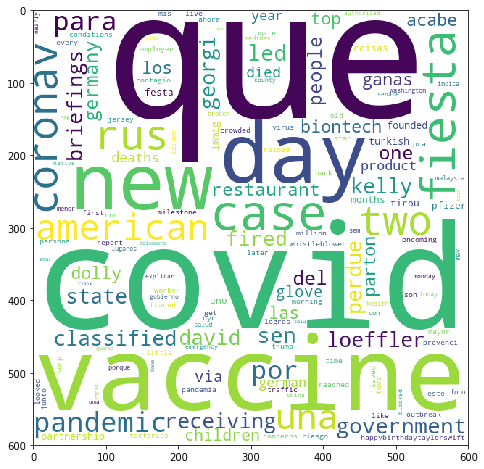

In [47]:
word_cloud=WordCloud(width=600, height=600, stopwords=stop_nltk,
                     background_color='white', max_words=150, 
                     normalize_plurals=True,collocations=False).\
generate_from_text(tweets_combined)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

## What are the sentiments of these tweets?

In [48]:
# import nltk
# nltk.download('vader_lexicon')

In [49]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

In [72]:
senti.polarity_scores("just heard the news")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [73]:
senti.polarity_scores("just heard the news smh")

{'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'compound': -0.3182}

In [74]:
senti.polarity_scores("just heard the news lol")

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

#### Defining a function to get the compound score for a given tweet

In [50]:
def get_sentiment_vader(tweet):
    return senti.polarity_scores(tweet)['compound']

In [51]:
senti_score = [get_sentiment_vader(txt) for txt in tweets_clean2]

In [52]:
senti_score[:5]

[0.0, 0.0, 0.6249, -0.5574, 0.0]

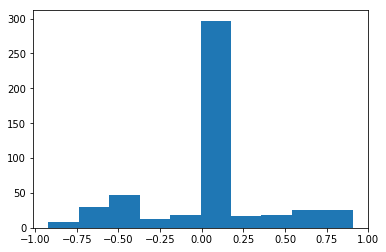

In [53]:
plt.hist(senti_score)
plt.show()

In [54]:
def get_sentiment(tweet):
    polarity=senti.polarity_scores(tweet)
    if(polarity['compound']>=0.05):
        return "Positive"
    elif(polarity['compound']<=-0.05):
        return "Negative"
    else:
        return "Neutral"

##### Creating a dataframe with the tweets, to which we will add the sentiement classification

In [55]:
df = pd.DataFrame({'tweet':tweets_clean2})
df.head()

,tweet
0,mis logros este 2020 por ahora tuve mate
1,after receiving classified government briefing...
2,pregnant and breastfeeding women may opt recei...
3,right now fired barnburner live with mlscup pr...
4,know that least the and times have been trying...


In [56]:
df['sentiment'] = df.tweet.apply(get_sentiment)

In [57]:
df.head()

,tweet,sentiment
0,mis logros este 2020 por ahora tuve mate,Neutral
1,after receiving classified government briefing...,Neutral
2,pregnant and breastfeeding women may opt recei...,Positive
3,right now fired barnburner live with mlscup pr...,Negative
4,know that least the and times have been trying...,Neutral


In [58]:
distr = df.sentiment.value_counts(normalize=True)
distr

Neutral     0.578
Negative    0.234
Positive    0.188
Name: sentiment, dtype: float64

##### Plotting - a pie chart of the sentiment classification

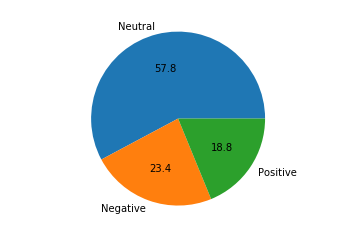

In [59]:
fig, ax = plt.subplots(); ax.axis("equal")
ax.pie(distr.values,labels=list(distr.keys()),autopct='%1.1f')
plt.show()

### Wordcloud for negative tweets

In [60]:
neg_tweets = df.tweet[df.sentiment=='Negative']
neg_tweets[5:10]

28    ellen degeneres has made the shock announcemen...
38    new jersey has reached new milestone the pande...
40                              just load fake promises
47    ten months and more than million global covid ...
49    breaking the fda has granted emergency use aut...
Name: tweet, dtype: object

In [61]:
neg_tweets_combined = " ".join(neg_tweets.values)

In [62]:
neg_tweets_combined[:500]

'right now fired barnburner live with mlscup preview mlscupplayoffs sports mls gxtnetwork top glove fired employee after raised concerns about crowded conditions one its factories two months later the telling covid origin story today misses key points about the whistleblowers the seafood market test kit you worried about the groceries other packages experts say keep the risk perspective top glove fired employee after raised concerns about crowded conditions one its factories two months later the '

In [63]:
# from wordcloud import STOPWORDS
# print(STOPWORDS)

In [64]:
# mystop = list(STOPWORDS) + ['economy']
# print(mystop)

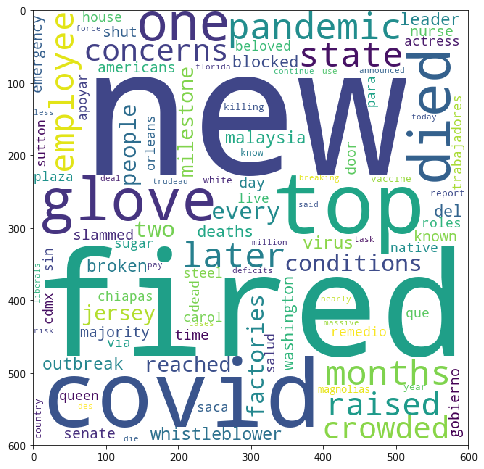

In [65]:
word_cloud=WordCloud(width=600,height=600,stopwords= stop_nltk,background_color='white',max_words=100,normalize_plurals=True,collocations=False).generate_from_text(" ".join(neg_tweets))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

In [66]:
len(neg_tweets[neg_tweets.str.contains('modi')])

0

In [67]:
neg_tweets[neg_tweets.str.contains('republicans')]

Series([], Name: tweet, dtype: object)

### Wordcloud for positive tweets

In [68]:
pos_tweets = df.tweet[df.sentiment=='Positive']
pos_tweets[:5]

2     pregnant and breastfeeding women may opt recei...
5     falta responsabilidad solidaridad ignorancia h...
10               ganas que acabe para una fiesta fiesta
13    dolly parton saved her year old star from onco...
31    the task force report which was obtained recom...
Name: tweet, dtype: object

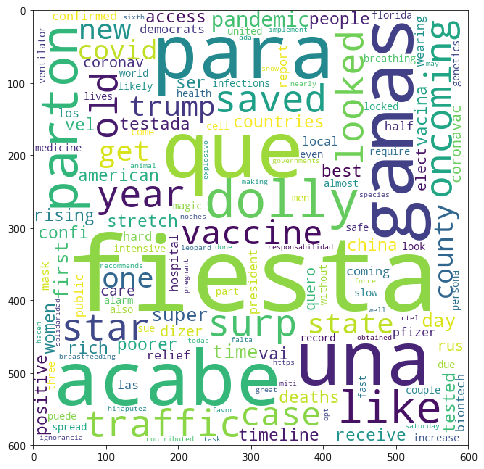

In [69]:
word_cloud=WordCloud(width=600,height=600,background_color='white',stopwords=stop_nltk,max_words=150,normalize_plurals=True,collocations=False).generate_from_text(" ".join(pos_tweets))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.show()

In [70]:
pos_tweets[pos_tweets.str.contains('novel')]

255    but here the rub trump receives intelligence t...
Name: tweet, dtype: object

In [71]:
df

,tweet,sentiment
0,mis logros este 2020 por ahora tuve mate,Neutral
1,after receiving classified government briefing...,Neutral
2,pregnant and breastfeeding women may opt recei...,Positive
3,right now fired barnburner live with mlscup pr...,Negative
4,know that least the and times have been trying...,Neutral
...,...,...
495,asking you have reservations before you sit do...,Neutral
496,argentina que fue durante casi mes que muertes...,Neutral
497,not taking the vaccine but give props potus fo...,Negative
498,,Neutral


### Task : With setiment column as label build a multi-class classfication model to predict the sentiment of a tweet